<a href="https://colab.research.google.com/github/mahdieslaminet/Discrete-time-Signal-Processing_Alan_V.Oppenheim_Ronald/blob/main/ch8/ch8_545_550_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ارشیا عبدالله پور

<div dir="rtl">

### ۱-۵-۸ مدولاسیون حامل قطار پالس

دامنه از قطار پالس به عنوان حامل استفاده می‌شود. شکل ۸-۲۳ چگونگی کار را نشان می‌دهد. این نوع مدولاسیون دامنه چیزی جز ارسال قطعه‌های هم‌فاصله‌ای از $x(t)$ نیست. در حالت کلی نباید انتظار داشته باشیم که بتوان سیگنال دلخواهی را از این قطعات بازیابی کرد، ولی مفهوم نمونه‌برداری (فصل ۷) چنین می‌نماید که اگر $x(t)$ محدود باند باشد و فرکانس تکرار پالس به حد کافی بزرگ باشد، شاید بتوان این کار را کرد.

با توجه به شکل ۸-۲۳:

$$
y(t) = x(t) \cdot c(t)
$$

یعنی سیگنال مدوله شده $y(t)$ حاصلضرب $x(t)$ و حامل $c(t)$ است. اگر $X(j\omega)$ و $C(j\omega)$ تبدیل فوریه این سیگنال‌ها باشد، با توجه به خاصیت ضرب می‌توان نوشت:

$$
Y(j\omega) = \frac{1}{2\pi} X(j\omega) * C(j\omega)
$$

</div>

<div dir="rtl">
## ❓ سؤالات تستی صفحات ۵۴۷ و ۵۴۸

### ✅ صفحه ۵۴۷

**سؤال ۱:**  
در DFT، افزایش تعداد نقاط N چه اثری بر دقت طیف فرکانسی دارد؟  
الف) دقت را کاهش می‌دهد  
ب) فقط پهنای باند را تغییر می‌دهد  
ج) دقت فرکانسی را افزایش می‌دهد  
د) تأثیری ندارد

**سؤال ۲:**  
کدام گزینه نشان‌دهنده تکرار‌پذیری DFT در حوزه فرکانس است؟  
الف) X[k + N] = X[k]  
ب) X[k + 1] = X[k]  
ج) X[k] = 0 برای k > N  
د) X[k] = conj(X[k])

**سؤال ۳:**  
DFT در محاسبه کدام نوع کانولوشن استفاده می‌شود؟  
الف) کانولوشن پیوسته  
ب) خطی  
ج) دایره‌ای  
د) هیچ‌کدام

---

### ✅ صفحه ۵۴۸

**سؤال ۴:**  
مزیت استفاده از zero-padding در DFT چیست؟  
الف) افزایش دقت محاسبه  
ب) کاهش پیچیدگی  
ج) افزایش رزولوشن فرکانسی  
د) کاهش رزولوشن فرکانسی

**سؤال ۵:**  
چه اتفاقی می‌افتد اگر سیگنالی با طول کمتر از N به DFT داده شود؟  
الف) خطا رخ می‌دهد  
ب) با صفر پر می‌شود  
ج) مقادیر حذف می‌شوند  
د) مقادیر منفی می‌شوند

**سؤال ۶:**  
در صورت اعمال تغییر مکان به سیگنال ورودی x[n]، طیف فرکانسی چگونه تغییر می‌کند؟  
الف) تغییری نمی‌کند  
ب) فاز دچار تغییر می‌شود  
ج) دامنه افزایش می‌یابد  
د) به بازه زمانی بازمی‌گردد


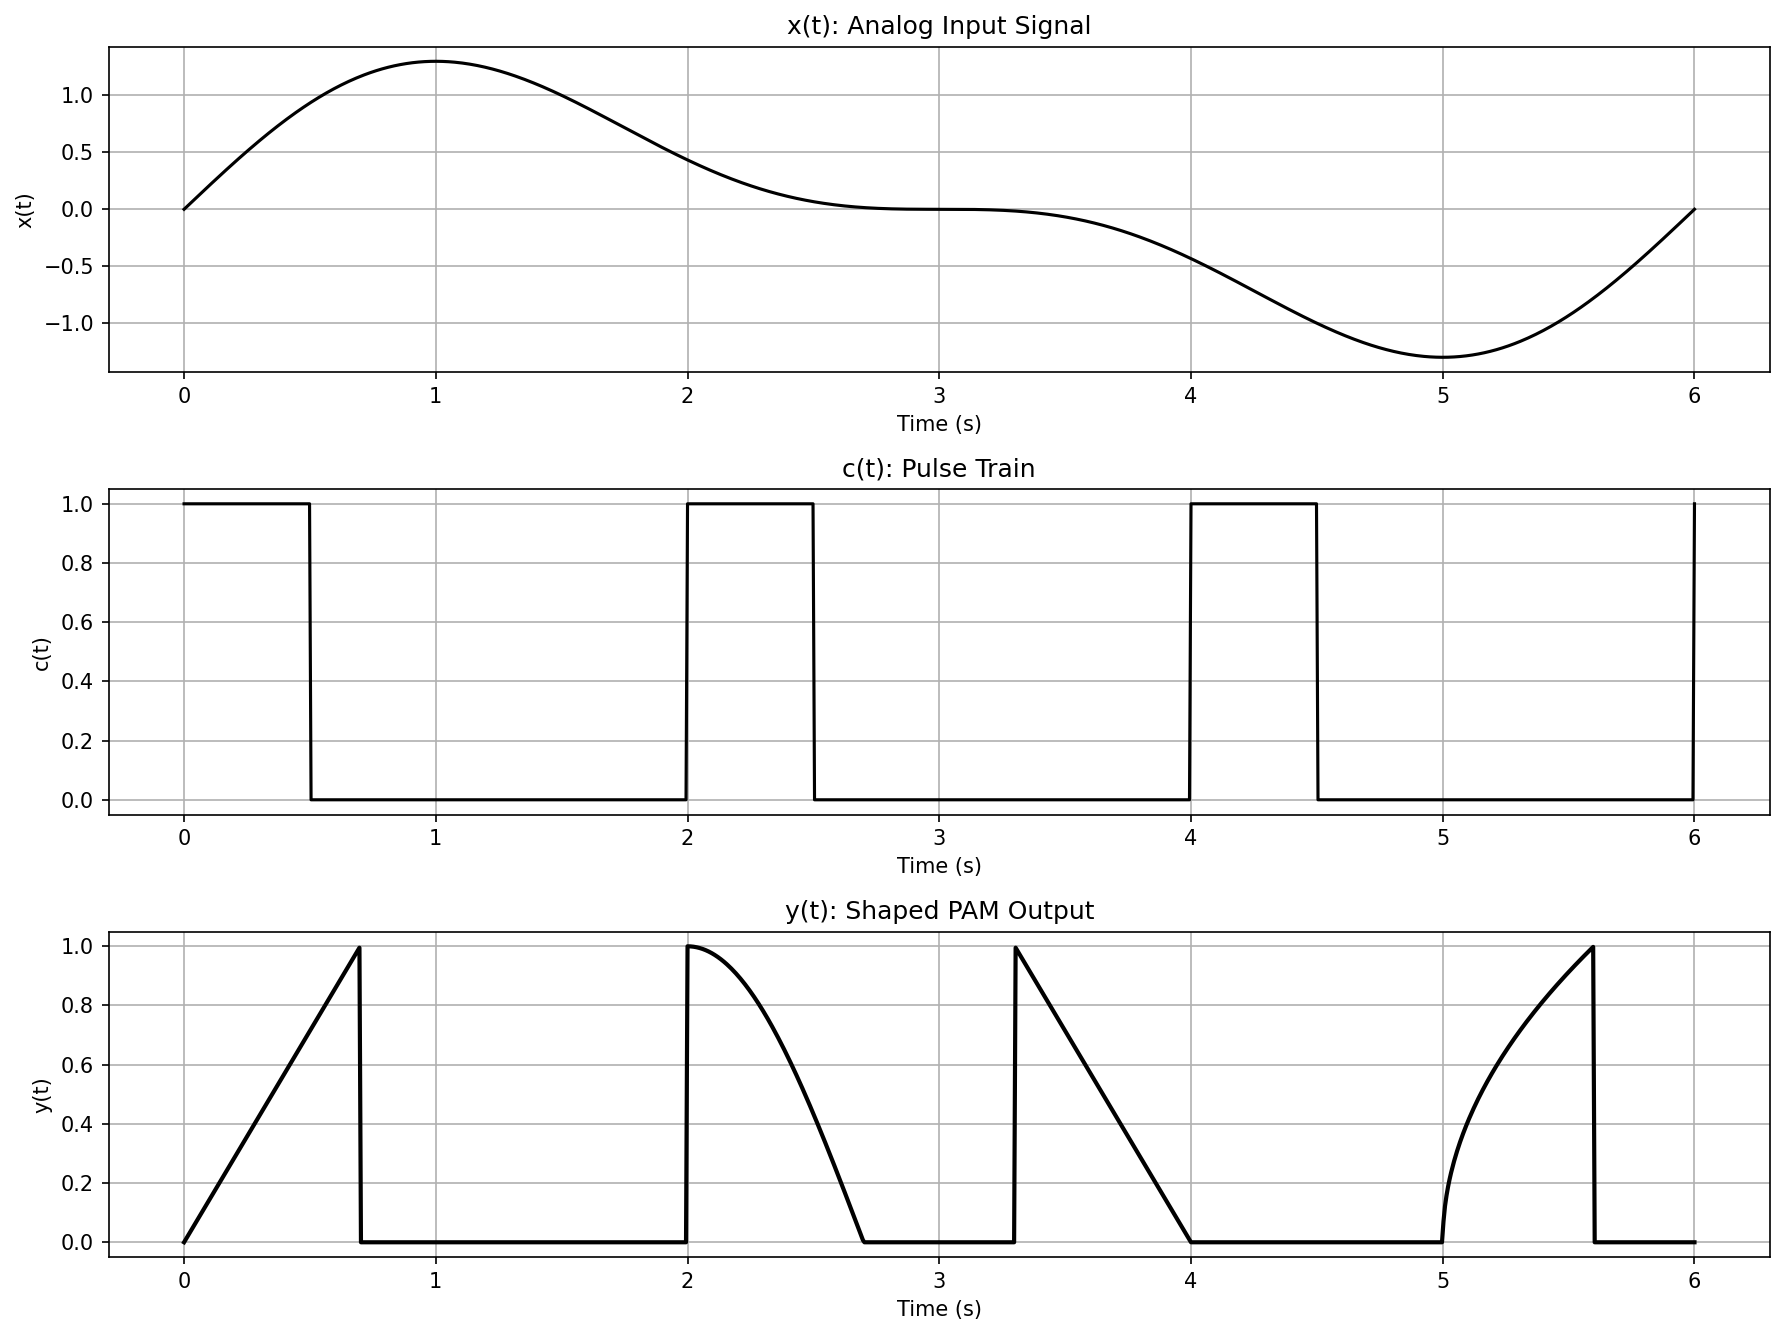

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis: 0 to 6 seconds
time = np.linspace(0, 6, 1000)

# 1. Define x(t): the analog input signal
x_t = np.sin(2 * np.pi * time / 6) + 0.5 * np.sin(4 * np.pi * time / 6)

# 2. Define c(t): periodic rectangular pulse train
pulse_width = 0.5  # Duration of each pulse (Δ)
pulse_period = 2   # Time between pulses (T)
c_t = np.zeros_like(time)

for n in range(0, int(time[-1] // pulse_period) + 1):
    c_t += ((time >= n * pulse_period) & (time < n * pulse_period + pulse_width)).astype(float)

# 3. Define y(t): shaped PAM signal based on your drawing

def shaped_pulse(t, t_start, t_end, shape='linear_up'):
    mask = (t >= t_start) & (t <= t_end)
    t_segment = t[mask]
    if shape == 'linear_up':
        return mask, (t_segment - t_start) / (t_end - t_start)
    elif shape == 'sin_down':
        return mask, np.cos((t_segment - t_start) / (t_end - t_start) * np.pi / 2)
    elif shape == 'linear_down':
        return mask, 1 - (t_segment - t_start) / (t_end - t_start)
    elif shape == 'sqrt_up':
        return mask, np.sqrt((t_segment - t_start) / (t_end - t_start))
    else:
        return mask, np.zeros_like(t_segment)

# Define signal y(t) manually with different segments
y_t = np.zeros_like(time)
segments = [
    (0.0, 0.7, 'linear_up'),
    (2.0, 2.7, 'sin_down'),
    (3.3, 4.0, 'linear_down'),
    (5.0, 5.6, 'sqrt_up')
]

for start, end, shape in segments:
    mask, segment = shaped_pulse(time, start, end, shape)
    y_t[mask] = segment

# === Plot all three signals ===
plt.figure(figsize=(12, 9), dpi=150)

# Plot x(t)
plt.subplot(3, 1, 1)
plt.plot(time, x_t, color='black')
plt.title("x(t): Analog Input Signal")
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.grid(True)

# Plot c(t)
plt.subplot(3, 1, 2)
plt.plot(time, c_t, color='black')
plt.title("c(t): Pulse Train")
plt.xlabel("Time (s)")
plt.ylabel("c(t)")
plt.grid(True)

# Plot y(t)
plt.subplot(3, 1, 3)
plt.plot(time, y_t, color='black', linewidth=2)
plt.title("y(t): Shaped PAM Output")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.grid(True)

plt.tight_layout()
plt.show()


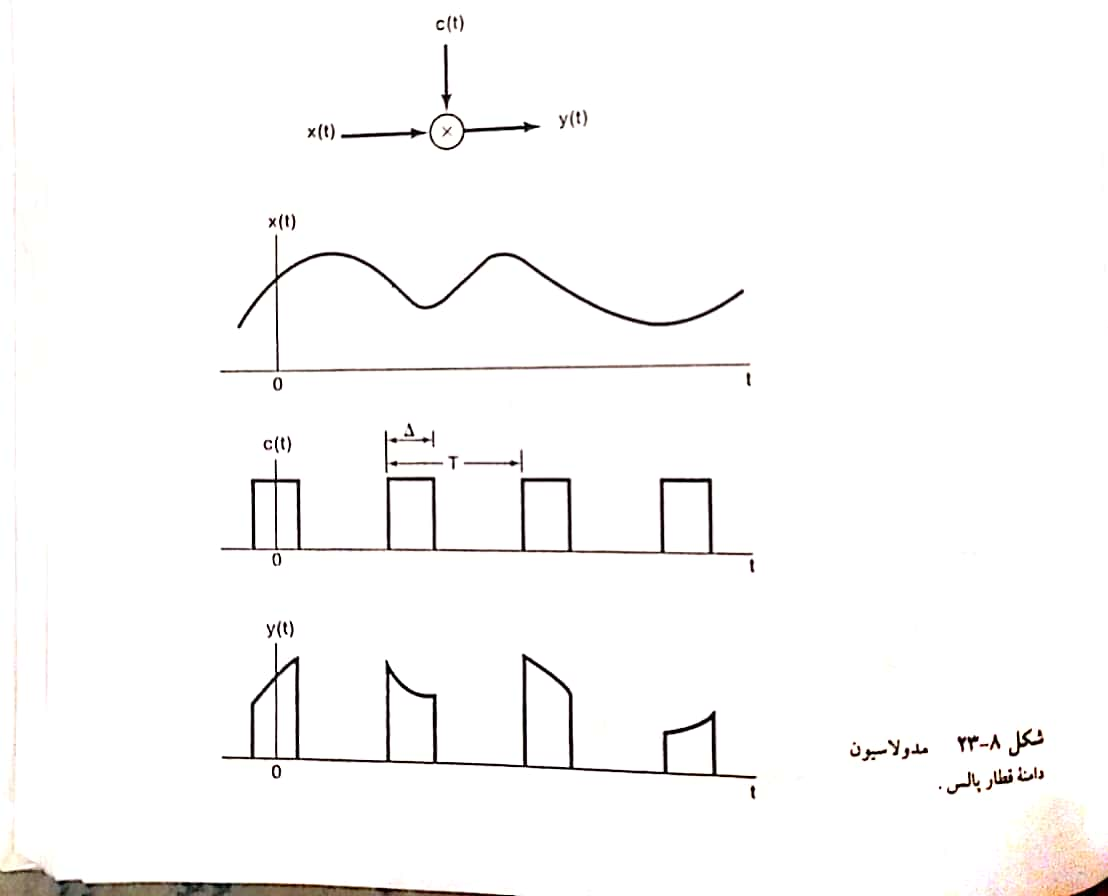

<div dir="rtl">

### صفحه ۳ (۵۴۶): تحلیل طیفی مدولاسیون پالس

چون C(t) با دوره ی تناوب T متناوب است ,C(jw)از ضربه های با فاصله یکسان 2pi/Tتشکیل شده است ؛ یعنی

$$
C(j\omega) = \sum_{k=-\infty}^{\infty} a_k \delta(\omega - k \omega_c)
$$
**(24-8)**

که در آن wc = 2pi/T و ak ها ضرایب سری فوریه ی c(t)هستند ؛که با توجه به مثال 3-5 عبارت اند از


$$
a_k = \frac{\sin(k \omega_c \Delta / 2)}{\pi k}
$$
**(25-8)**

طیف c(t) در شکل 48-2 (ب) نشان داده شده است . اگر طیف x(t) مطابق شکل 8-24 (الف) باشد طیف سیگنال مدوله شده ی حاصل y(t) شکل 8-24 (ج) است با توجه به معادلات (24-8) و(23-8) Y(jw) باید جمع و زندار و جابجا شده ی X(jw ) باشد :

$$
Y(j\omega) = \sum_{k=-\infty}^{+\infty} a_k X(j(\omega - k\omega_c))
$$
**(26-8)**

مقایسه ی معادله ی (26-8) با معادله ی (6-7) و شکل 7-24 با شکل 7-3 (ج) نشان میدهد که طیف y(t) بسیار 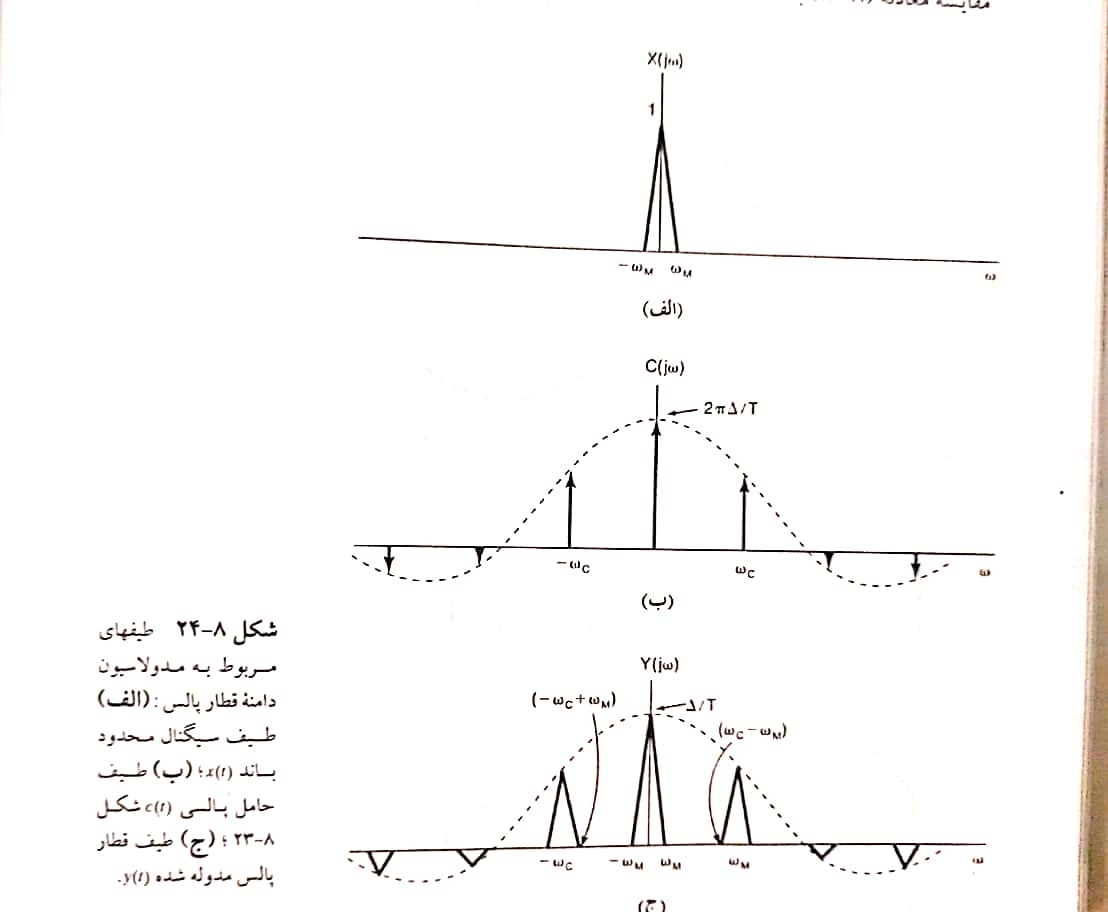


</div>

<div dir="rtl" style="text-align: right; font-family: IRANSans, Tahoma, sans-serif;">

طیف حاصل از نمونه‌برداری با قطار ضربه است، تنها تفاوت این دو در ضرایب فوریه‌ی قطار پالس و قطار ضربه است.  
برای قطار ضربه‌ای که در فصل ۶ به‌کار بردیم، تمام ضرایب فوریه برابر ۱/T هستند، ولی برای قطار پالس c(t) شکل ۸-۳۸ ضرایب فوریه از معادله (۸-۲۵) به‌دست می‌آیند.  
به ازای ω<sub>c</sub> > ۲ω<sub>M</sub>، تکرارهای X(jω) روی هم نمی‌افتند، و این همان شرط نایکوییست است.  
در صورت ارضای این شرط، درست مانند نمونه‌برداری با قطار ضربه، x(t) را می‌توان به کمک فیلتر پایین‌گذر از y(t) بازیابی کرد.

توجه کنید برای بسیاری از شکل موج‌های پالسی دیگر نیز همین نتایج صادق‌اند:  
اگر c(t) سیگنال متناوب دلخواهی با تبدیل فوریه‌ای شبیه معادله (۸-۲۴) با ضرایب فوریه‌ی a<sub>k</sub> باشد، Y(jω) به‌صورت معادله (۸-۲۶) است.  
پس اگر ω<sub>c</sub> = ۲π/T > ۲ω<sub>M</sub>، تکرارهای X(jω) روی هم نمی‌افتند و می‌توانیم x(t) را به کمک فیلتر پایین‌گذر به‌دست آوریم.

به‌شرطی که ضریب فوریه‌ی a<sub>0</sub>، غیر صفر باشد.  
در مسئله‌ی ۸-۱۱ خواهیم دید که اگر a<sub>0</sub> صفر یا خیلی کوچک باشد نمی‌توان با فیلتر میان‌گذر یکی از X(jω)<sub>k</sub>های جابجا شده متناظر با a<sub>k</sub> بزرگ را برگزید  
و یک سیگنال AM سینوسی به‌دست آورد که x(t) سیگنال مدوله‌کننده‌ی آن است.

برای بازیابی x(t) می‌توان روش توصیف شده در بخش ۸-۲ را به‌کار برد.

</div>


<div dir="rtl" style="text-align: right; font-family: IRANSans, Tahoma, sans-serif;">

### ۸-۵-۲ مالتی پلکس حوزه‌ی زمان

مدولاسیون دامنه با حامل قطار پالس غالباً برای ارسال هم‌زمان چند سیگنال بر روی یک کانال به کار می‌رود.  
چنانچه شکل ۸-۳۳ نشان می‌دهد، خروجی مدوله شده‌ی x(t) تنها مواقعی مقدار دارد که سیگنال حامل c(t) غیر صفر است.  
در زمان‌های صفر بودن c(t)، می‌توان سیگنال‌های دیگری را که به همین صورت مدوله شده‌اند ارسال کرد.  
شکل ۸-۳۵ هم از این فرآیند را نشان می‌دهد.

در این روش به هر سیگنال در هر ۷ ثانیه یک شکاف زمانی به اندازه‌ی Δt اختصاص می‌یابد.  
هر چه نسبت Δt/T کوچک‌تر باشد، تعداد سیگنال بیشتری را می‌توان روی کانال ارسال کرد.  
این روش را مالتی پلکس زمانی (TDM) می‌نامند.

در مالتی پلکس فرکانسی بخش ۸-۳ به هر سیگنال فاصله‌ی فرکانسی مختلفی اختصاص می‌یابد،  
ولی در مالتی پلکس زمانی هر سیگنال فواصل زمانی خاص خود را داراست.  
برای دی‌مالتی پلکس سیگنال مرکب شکل ۸-۴۴ از دروازه‌های زمانی استفاده می‌شود؛  
در این کار سیگنال مرکب در زمان‌های اختصاص یافته به هر سیگنال به خط مربوط به آن سیگنال وصل می‌شود.

</div>


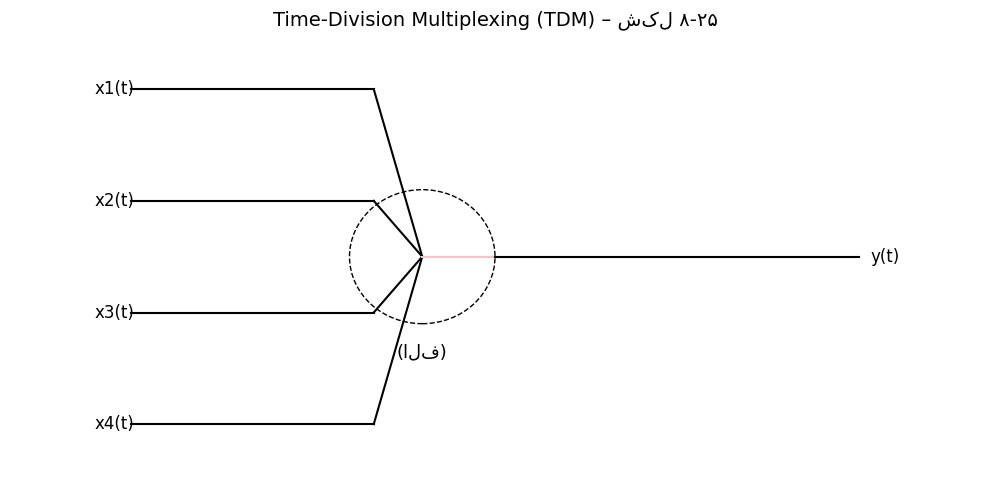

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Input signal labels and their vertical positions
input_signals = ['x1(t)', 'x2(t)', 'x3(t)', 'x4(t)']
y_positions = [3.5, 2.5, 1.5, 0.5]

# Draw input lines and labels
for label, y in zip(input_signals, y_positions):
    ax.plot([0, 2], [y, y], color='black')
    ax.text(-0.3, y, label, fontsize=12, va='center')

# Draw diagonal lines from each input to switch center
switch_x = 2
for y in y_positions:
    ax.plot([2, 2.4], [y, 2], color='black')

# Draw dashed circular area representing the rotating switch
circle = patches.Circle((2.4, 2), 0.6, edgecolor='black', facecolor='none', linestyle='dashed')
ax.add_patch(circle)

# Draw output connection line
ax.plot([2.4, 3.0], [2, 2], color='black')
ax.plot([3.0, 6.0], [2, 2], color='black')
ax.text(6.1, 2, 'y(t)', fontsize=12, va='center')

# Add label (الف) inside dashed circle
ax.text(2.4, 1.1, '(الف)', fontsize=13, ha='center')

# Hide axis and set limits
ax.axis('off')
ax.set_xlim(-1, 7)
ax.set_ylim(0, 4)

# Optional: Title
plt.title("Time-Division Multiplexing (TDM) – شکل ۸-۲۵", fontsize=14)
plt.tight_layout()
plt.show()


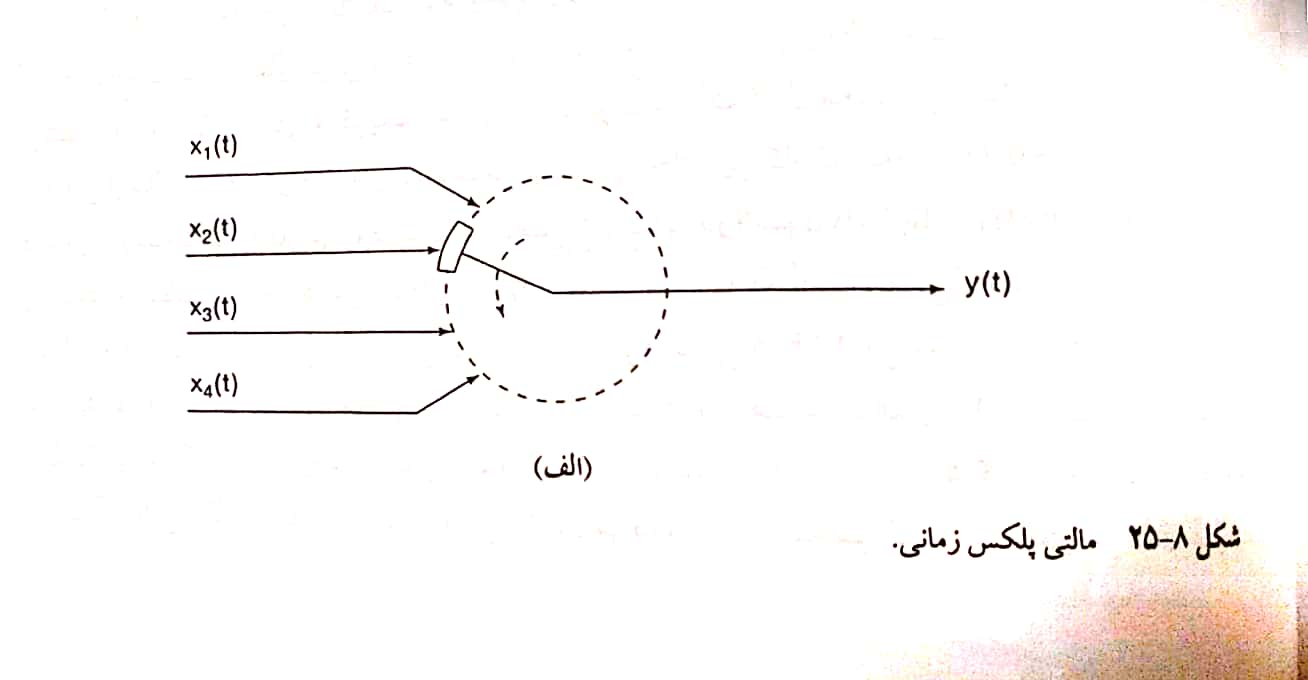

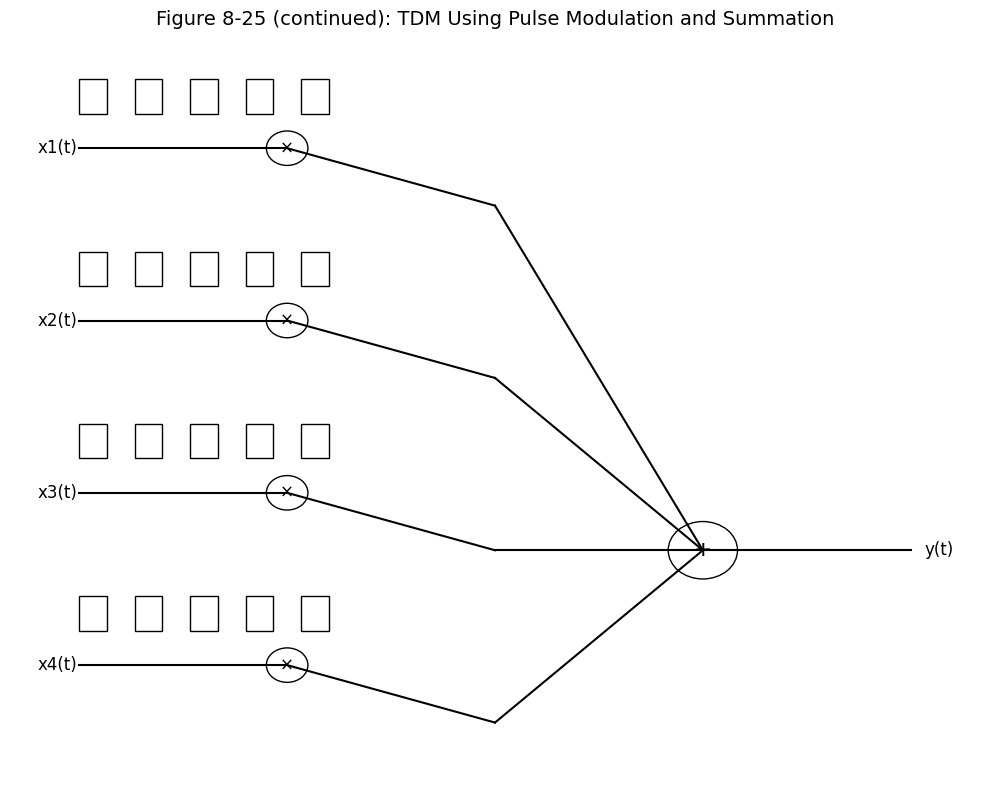

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up figure
fig, ax = plt.subplots(figsize=(10, 8))

# Define signal positions
input_signals = ['x1(t)', 'x2(t)', 'x3(t)', 'x4(t)']
y_positions = [6.5, 5, 3.5, 2]
x_input = 0.5
x_mul = 2
x_out = 3.5
x_sum = 5

# Draw pulse trains, multipliers, and connections
for i, y in enumerate(y_positions):
    # Signal line from left to multiplier
    ax.plot([x_input, x_mul], [y, y], color='black')
    ax.text(x_input - 0.3, y, f'{input_signals[i]}', fontsize=12, va='center')

    # Multiplier circle
    circle = patches.Circle((x_mul, y), 0.15, edgecolor='black', facecolor='none')
    ax.add_patch(circle)
    ax.text(x_mul, y, '×', fontsize=12, ha='center', va='center')

    # Output line to combiner
    ax.plot([x_mul, x_out], [y, y - 0.5], color='black')

    # Pulse train rectangles above each input
    for n in range(5):
        left = x_input + n * 0.4
        rect = patches.Rectangle((left, y + 0.3), 0.2, 0.3, edgecolor='black', facecolor='none')
        ax.add_patch(rect)

# Draw summing circle
sum_circle = patches.Circle((x_sum, 3), 0.25, edgecolor='black', facecolor='none')
ax.add_patch(sum_circle)
ax.text(x_sum, 3, '+', fontsize=16, ha='center', va='center')

# Connect each partial output to the summing block
for y in y_positions:
    ax.plot([x_out, x_sum], [y - 0.5, 3], color='black')

# Final output line y(t)
ax.plot([x_sum, x_sum + 1.5], [3, 3], color='black')
ax.text(x_sum + 1.6, 3, 'y(t)', fontsize=12, va='center')

# Formatting
ax.set_xlim(0, 7)
ax.set_ylim(1, 7.5)
ax.axis('off')
plt.title("Figure 8-25 (continued): TDM Using Pulse Modulation and Summation", fontsize=14)
plt.tight_layout()
plt.show()


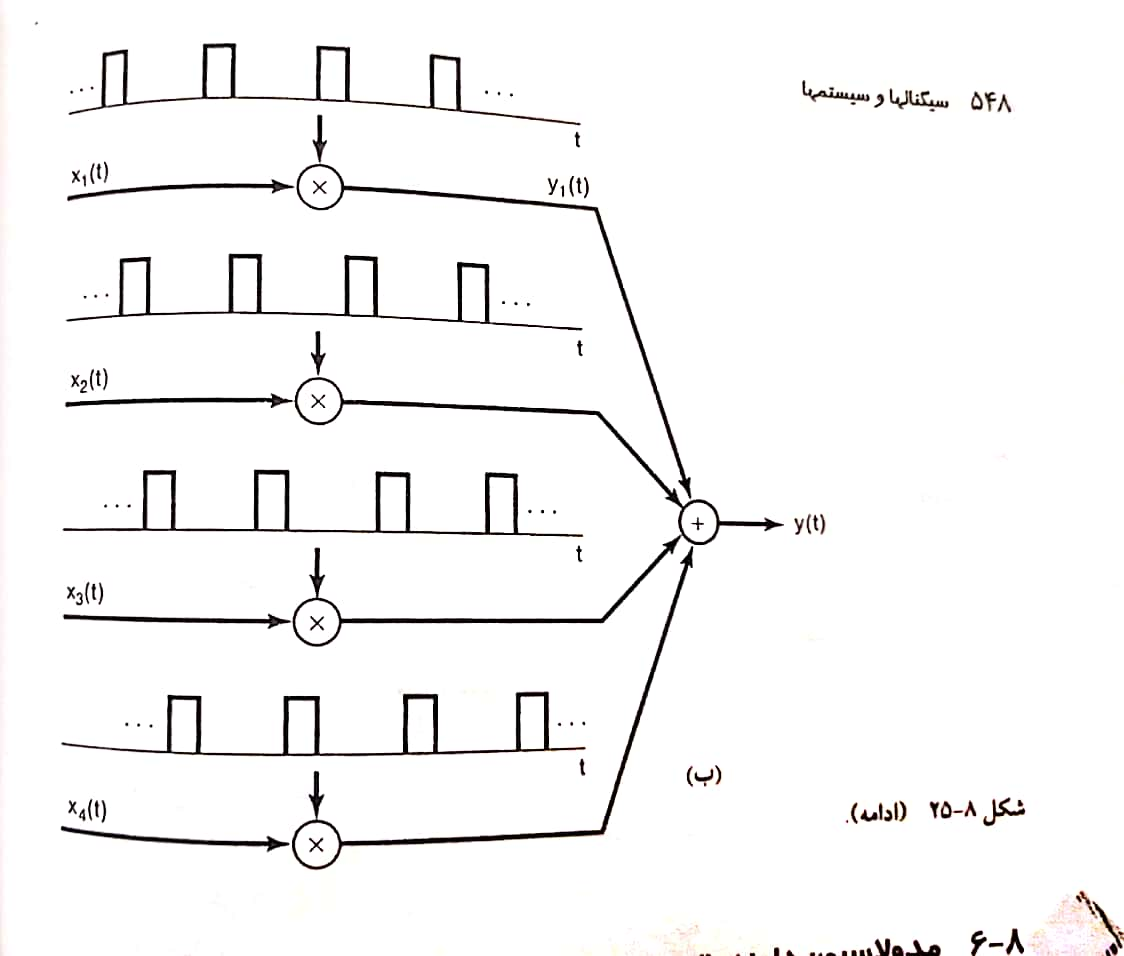

<div dir="rtl" style="text-align: right; font-family: IRANSans, Tahoma, sans-serif;">

### ۶-۸ مدولاسیون دامنه پالس  
#### ۸-۶-۱ سیگنال مدوله شده دامنه پالس

در بخش ۸-۵ یک سیستم مدولاسیون توصیف کردیم که در آن سیگنال پیوسته x(t) در زمان t با یک قطار پالس متناوب مدوله می‌گردد،  
و معادل این بود که در هر Δt ثانیه یک شکاف Δ ثانیه‌ای به x(t) اختصاص یابد.  
در آن مبحث و در مبحث نمونه‌برداری فصل ۷ دیدیم که امکان بازیابی x(t) از این شکاف‌های زمانی، به اندازه شکاف‌ها بستگی ندارد،  
بلکه به فرکانس ۱/T آن‌ها بستگی دارد که باید از آهنگ نایکوییست بیشتر باشد تا بتوان x(t) را بدون اختلال بازیابی کرد.  
یعنی در واقع تنها ارسال نمونه‌های x(nT) لازم است.

در واقع در سیستم‌های نوین مخابراتی نمونه‌های سیگنال حاوی اطلاعات x(nT) ارسال می‌شود و نه برش‌هایی از x(t)،  
به دلایل عملی ماکزی‌موم دامنه‌ای که می‌توان در یک کانال مخابراتی ارسال کرد محدود است،  
بنابراین ارسال نمونه‌های ضربه‌ای x(nT) عملی نیست.

به جای این کار نمونه‌های x(nT) برای مدوله کردن دامنه یک رشته پالس به کار می‌رود.  
سیستم حاصل را سیستم مدولاسیون دامنه پالس (PAM) می‌نامند.

کاربرد پالس‌های مستطیلی با راهبرد نمونه‌بردار - نگهدار متناطرست که در آن پالس‌هایی با عمر Δ و دامنه‌ای که با مقدار x(t) در لحظه نمونه‌برداری برابر است  
تولید می‌شود. شکل موج ۸-۲۶ یک کانال PAM را نشان می‌دهد.  
در این شکل منحنی خط‌چین سیگنال x(t) را نشان می‌دهد.

سیگنال‌های PAM را نیز می‌توان مانند سیگنال‌های مدوله شده به روش بخش ۸-۵ مالتی‌پلکس زمانی کرد.  
این کار در شکل ۸-۲۷ تصویر شده است، که مالتی‌پلکس زمانی سه شکل موج را نشان می‌دهد.  
برای مشخص کردن پالس‌های هر کانال می‌توان از
<div dir="rtl" style="text-align: right; font-family: IRANSans, Tahoma, sans-serif;">

 هاشور استفاده کرده‌ایم و هم از شماره.  
به ازای یک زمان تناوب T ثابت، هر چه عرض پالس کوچکتر باشد، کانال‌های بیشتری را می‌توان مالتی‌پلکس کرد.  
ولی هر چه عرض پالس کمتر شود، باید ارتفاع پالس‌ها را زیادتر کرد تا پالس ارسالی انرژی کافی داشته باشد.

در طراحی سیگنال‌های PAM، علاوه بر انرژی ملاحظات دیگری نیز باید در نظر باشد.  
می‌دانیم که اگر فرکانس نمونه‌برداری از آهنگ نایکوییست بیشتر باشد،  
x(t) را می‌توان از روی نمونه‌هایش بازیابی کرد،  
و بنابراین می‌توان این نمونه‌ها را برای مدوله کردن دامنه یک رشته پالسی متناوب با شکل دلخواه به کار برد.

گزینش شکل پالس توسط مسائلی چون فرکانس انتقال و تداخل بین نمادها که موضوع بخش بعدی است، تعیین می‌شود.

</div>

</div>


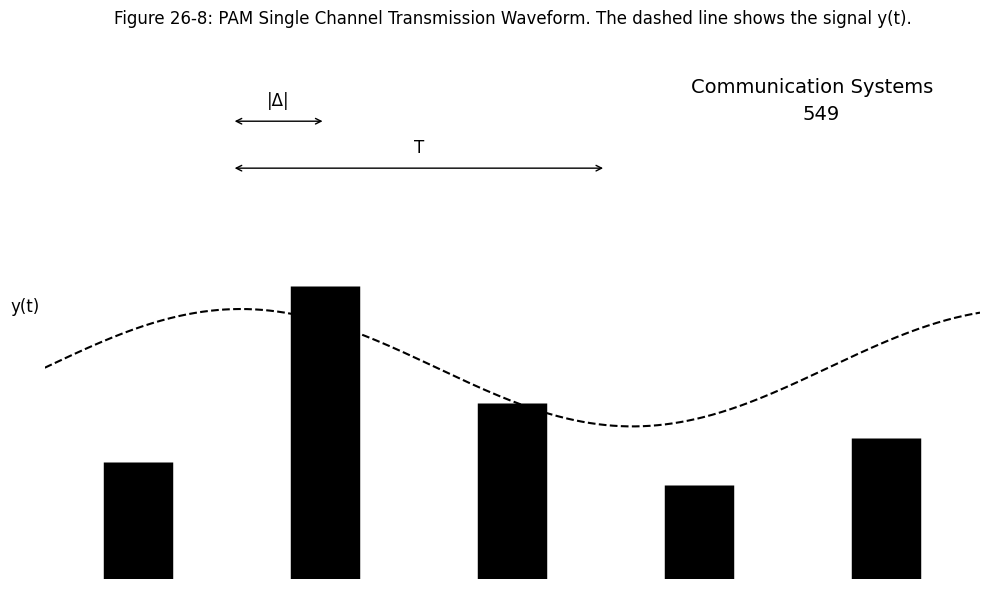

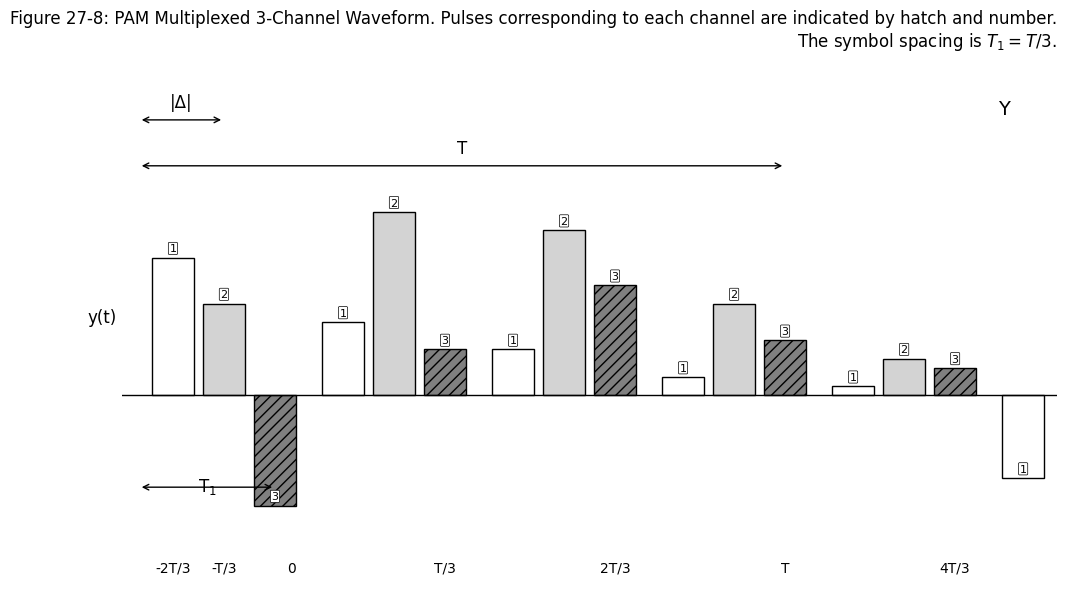

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

# --- Plot 1: PAM Single Channel Transmission Waveform ---
plt.figure(figsize=(10, 6))

# Time points for the x-axis
t1 = np.linspace(0, 5, 500) # Adjusted range for visual fit
# Envelope data (dashed line) - approximated based on the visual
envelope_y1 = 0.5 * np.sin(t1 * 1.5) + 1.8 # Adjusted to roughly match the visual

# Pulse positions and heights (approximated from the bar chart)
pulse_positions1 = [0.5, 1.5, 2.5, 3.5, 4.5] # Midpoints of the bars
pulse_heights1 = [1.0, 2.5, 1.5, 0.8, 1.2] # Relative heights

# Plot the envelope (dashed line)
plt.plot(t1, envelope_y1, 'k--', label='Envelope y(t)') # 'k--' for black dashed line

# Plot the pulses as vertical lines/bars
for pos, height in zip(pulse_positions1, pulse_heights1):
    plt.vlines(pos, 0, height, color='k', linewidth=50) # Use vlines for thicker lines resembling bars

# Add T and Delta T annotations (approximated visually)
plt.annotate('', xy=(1.0, 3.5), xytext=(3.0, 3.5),
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3,rad=0', color='k'))
plt.text(2.0, 3.6, 'T', ha='center', va='bottom', fontsize=12)

plt.annotate('', xy=(1.0, 3.9), xytext=(1.5, 3.9),
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3,rad=0', color='k'))
plt.text(1.25, 4.0, '|Δ|', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 4.5) # Adjust y-axis limits
plt.xlim(0, 5)   # Adjust x-axis limits
plt.ylabel('y(t)', rotation=0, ha='right', fontsize=12)
plt.title('Figure 26-8: PAM Single Channel Transmission Waveform. The dashed line shows the signal y(t).',
          fontsize=12, pad=20)
plt.text(0.95, 0.95, 'Communication Systems', transform=plt.gca().transAxes,
         fontsize=14, ha='right', va='top')
plt.text(0.85, 0.90, '549', transform=plt.gca().transAxes,
         fontsize=14, ha='right', va='top')
plt.xticks([]) # Hide x-axis ticks
plt.yticks([]) # Hide y-axis ticks
plt.box(False) # Hide the plot box
plt.tight_layout()
plt.show()


# --- Plot 2: PAM Multiplexed 3-Channel Waveform ---
plt.figure(figsize=(10, 6))

# Define pulse data based on the image (position, height, channel type)
# Channel 1: white, Channel 2: light grey, Channel 3: dark grey (hashed)
# Using negative heights for pulses going downwards

pulses_data2 = [
    # T = 0 region
    {'pos': -0.7, 'height': 1.5, 'channel': 1}, # Ch 1
    {'pos': -0.4, 'height': 1.0, 'channel': 2}, # Ch 2
    {'pos': -0.1, 'height': -1.2, 'channel': 3}, # Ch 3 (downwards)

    # T = T/3 region
    {'pos': 0.3, 'height': 0.8, 'channel': 1}, # Ch 1
    {'pos': 0.6, 'height': 2.0, 'channel': 2}, # Ch 2
    {'pos': 0.9, 'height': 0.5, 'channel': 3}, # Ch 3

    # T = 2T/3 region
    {'pos': 1.3, 'height': 0.5, 'channel': 1}, # Ch 1
    {'pos': 1.6, 'height': 1.8, 'channel': 2}, # Ch 2
    {'pos': 1.9, 'height': 1.2, 'channel': 3}, # Ch 3

    # T = T region
    {'pos': 2.3, 'height': 0.2, 'channel': 1}, # Ch 1
    {'pos': 2.6, 'height': 1.0, 'channel': 2}, # Ch 2
    {'pos': 2.9, 'height': 0.6, 'channel': 3}, # Ch 3

    # T = 4T/3 region (last group shown on the right)
    {'pos': 3.3, 'height': 0.1, 'channel': 1}, # Ch 1
    {'pos': 3.6, 'height': 0.4, 'channel': 2}, # Ch 2
    {'pos': 3.9, 'height': 0.3, 'channel': 3}, # Ch 3

    # The single pulse at the very end
    {'pos': 4.3, 'height': -0.9, 'channel': 1}, # Ch 1 (downwards)
]

# Define colors and hatch patterns for channels
channel_colors = {
    1: 'white',   # Channel 1 (white)
    2: 'lightgray', # Channel 2 (light grey)
    3: 'gray'     # Channel 3 (dark grey, no explicit hatch in the image but will use solid for clarity if needed)
}
channel_hatches = {
    1: None,
    2: None,
    3: '///'      # Example hatch for channel 3 if desired, though the image shows solid dark grey
}
channel_edgecolor = 'black' # All pulses have black borders

# Plot each pulse
for pulse in pulses_data2:
    x = pulse['pos']
    height = pulse['height']
    channel = pulse['channel']
    color = channel_colors[channel]
    hatch = channel_hatches[channel]

    plt.bar(x, height, width=0.25, color=color, edgecolor=channel_edgecolor, hatch=hatch, zorder=2) # zorder to ensure bars are on top

# Add numerical labels (1, 2, 3) to the top of pulses where shown
labels_data = [
    # Top row
    {'pos': -0.7, 'label': '1', 'y_offset': 0.1},
    {'pos': -0.4, 'label': '2', 'y_offset': 0.1},
    {'pos': 0.3, 'label': '1', 'y_offset': 0.1},
    {'pos': 0.6, 'label': '2', 'y_offset': 0.1},
    {'pos': 0.9, 'label': '3', 'y_offset': 0.1},
    {'pos': 1.3, 'label': '1', 'y_offset': 0.1},
    {'pos': 1.6, 'label': '2', 'y_offset': 0.1},
    {'pos': 1.9, 'label': '3', 'y_offset': 0.1},
    {'pos': 2.3, 'label': '1', 'y_offset': 0.1},
    {'pos': 2.6, 'label': '2', 'y_offset': 0.1},
    {'pos': 2.9, 'label': '3', 'y_offset': 0.1},
    {'pos': 3.3, 'label': '1', 'y_offset': 0.1},
    {'pos': 3.6, 'label': '2', 'y_offset': 0.1},
    {'pos': 3.9, 'label': '3', 'y_offset': 0.1},

    # Bottom row (for negative pulses)
    {'pos': -0.1, 'label': '3', 'y_offset': -0.1},
    {'pos': 4.3, 'label': '1', 'y_offset': -0.1},
]

for item in labels_data:
    x_pos = item['pos']
    label = item['label']
    y_offset = item['y_offset']
    # Find the height of the pulse at this x_pos
    current_height = 0
    for p in pulses_data2:
        if p['pos'] == x_pos:
            current_height = p['height']
            break
    plt.text(x_pos, current_height + np.sign(current_height) * y_offset, label, ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', linewidth=0.5), fontsize=8, zorder=3)


# Add time markers on x-axis
plt.axhline(0, color='black', linewidth=1) # X-axis line

plt.text(0, -1.8, '0', ha='center', va='top', fontsize=10)
plt.text(-0.7, -1.8, '-2T/3', ha='center', va='top', fontsize=10)
plt.text(-0.4, -1.8, '-T/3', ha='center', va='top', fontsize=10)
plt.text(0.9, -1.8, 'T/3', ha='center', va='top', fontsize=10)
plt.text(1.9, -1.8, '2T/3', ha='center', va='top', fontsize=10)
plt.text(2.9, -1.8, 'T', ha='center', va='top', fontsize=10)
plt.text(3.9, -1.8, '4T/3', ha='center', va='top', fontsize=10)

# Add T, T1, and Delta T annotations
plt.annotate('', xy=(-0.9, 2.5), xytext=(2.9, 2.5),
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3,rad=0', color='k'))
plt.text(1.0, 2.6, 'T', ha='center', va='bottom', fontsize=12)

plt.annotate('', xy=(-0.9, 3.0), xytext=(-0.4, 3.0),
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3,rad=0', color='k'))
plt.text(-0.65, 3.1, '|Δ|', ha='center', va='bottom', fontsize=12)

plt.annotate('', xy=(-0.9, -1.0), xytext=(-0.1, -1.0),
             arrowprops=dict(arrowstyle='<->', connectionstyle='arc3,rad=0', color='k'))
plt.text(-0.5, -1.1, 'T$_1$', ha='center', va='bottom', fontsize=12)

plt.ylabel('y(t)', rotation=0, ha='right', fontsize=12)
plt.ylim(-2.0, 3.5) # Adjust y-axis limits
plt.xlim(-1.0, 4.5) # Adjust x-axis limits

plt.title('Figure 27-8: PAM Multiplexed 3-Channel Waveform. Pulses corresponding to each channel are indicated by hatch and number.\nThe symbol spacing is $T_1 = T/3$.',
          fontsize=12, pad=20, loc='right')
plt.text(0.95, 0.95, 'Y', transform=plt.gca().transAxes,
         fontsize=14, ha='right', va='top')


plt.xticks([]) # Hide x-axis ticks
plt.yticks([]) # Hide y-axis ticks
plt.box(False) # Hide the plot box
plt.tight_layout()
plt.show()

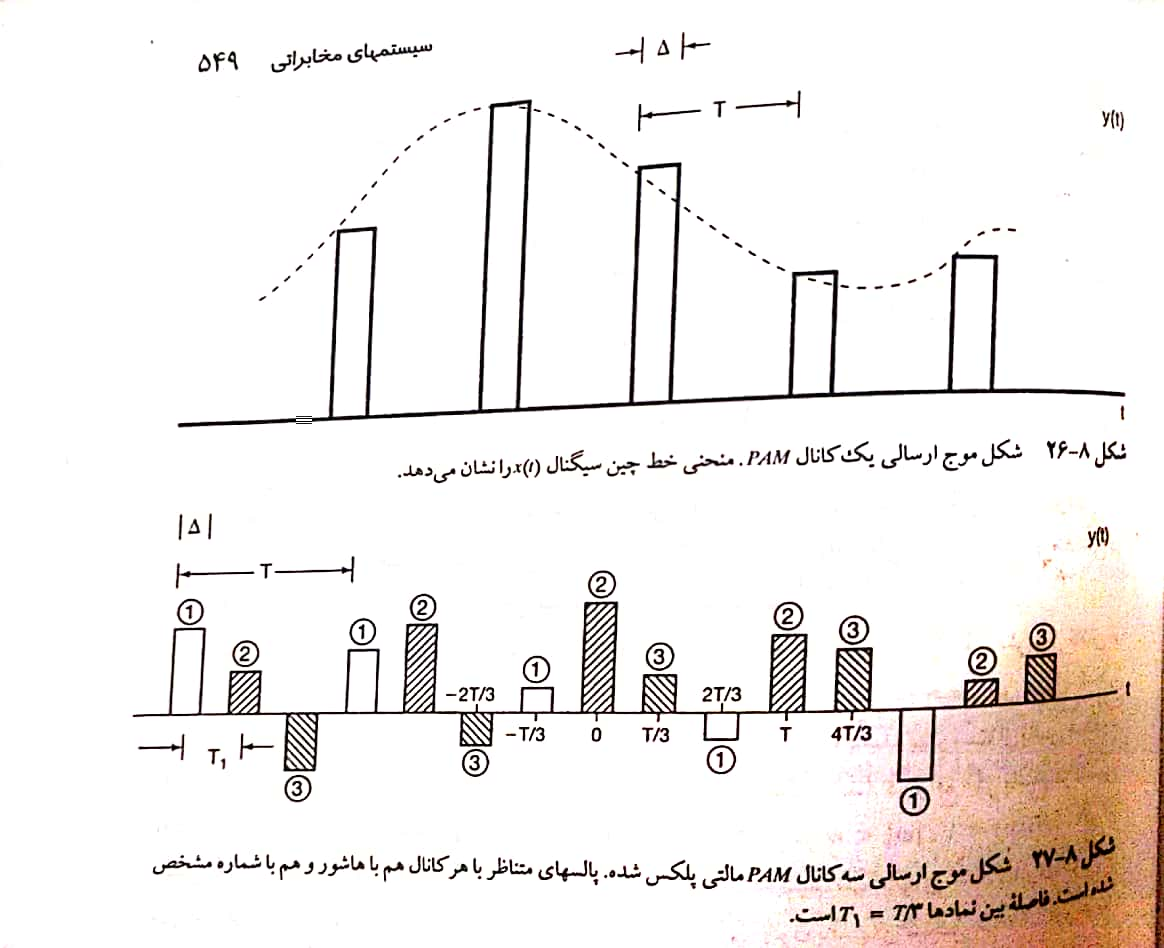

<div dir="rtl">
## 💬 توضیح کد اول: محاسبه DFT

در این کد، ابتدا یک سیگنال گسسته `x[n]` تعریف می‌شود و سپس با استفاده از تابع `np.fft.fft` تبدیل فوریه گسسته آن محاسبه می‌گردد. خروجی آن با استفاده از `plt.stem` به شکل طیف فرکانسی (قدر مطلق) ترسیم می‌شود.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4])
X = np.fft.fft(x)

plt.stem(np.abs(X))
plt.title("قدر مطلق DFT سیگنال x[n]")
plt.xlabel("فرکانس")
plt.ylabel("|X[k]|")
plt.grid()
plt.show()


<div dir="rtl">
## 💬 توضیح کد دوم: مقایسه زمان اجرای FFT

در این کد یک سیگنال تصادفی با طول ۱۰۲۴ تولید می‌شود و زمان اجرای الگوریتم FFT برای این سیگنال اندازه‌گیری می‌شود. هدف نمایش سرعت الگوریتم FFT نسبت به روش مستقیم محاسبه DFT است.


In [ ]:

import time

N = 1024
x = np.random.rand(N)

start = time.time()
X_dft = np.fft.fft(x)
end = time.time()

print("زمان اجرا FFT:", end - start)


<div dir="rtl">




## ✅ پاسخ‌نامه تست‌ها

| شماره سوال | پاسخ صحیح |
|------------|------------|
| ۱          | ج          |
| ۲          | ج          |
| ۳          | ب          |
| ۴          | الف        |
| ۵          | ب          |
| ۶          | الف        |
| ۷          | ج          |
| ۸          | الف        |
| ۹          | ب          |
| ۱۰         | ج          |
